In [89]:
import pandas as pd
import numpy as np
import seaborn as sns

In [207]:
from preprocessing import preprocessing_training , preprocessing_testing

In [208]:
from sklearn.model_selection import train_test_split

In [268]:
pre_test = preprocessing_testing(x_test,map_list[0],map_list[1],map_list[2],map_list[3])

df_test = pre_test.preprocessing()

C:\Users\USER\Documents\GitHub\cathaylife_interview\interview_cathaylife\script\preprocessing.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambda x: self.map_gender[x])
C:\Users\USER\Documents\GitHub\cathaylife_interview\interview_cathaylife\script\preprocessing.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambda x: self.map_vehicle_damage[x])


In [269]:
for col in df_test.columns:
    if (str(df_test[col].dtype) == 'object') | (str(df_test[col].dtype) == 'category'):
        print(f'Drop {col} type {df_test[col].dtype}')
        df_test.drop(col, axis=1, inplace=True)

Drop Vehicle_Age type object
Drop Age_group type category


In [270]:
 df_test = df_test.drop(['id','Response','Age'],axis=1)

In [232]:
df_final_.shape

(601690, 21)

In [228]:
df_test.shape

(38111, 25)

In [266]:
x_train,x_test,y_train,y_test = train_test_split(train,train['Response'],test_size=0.1,random_state=42)

In [271]:
pre_train = preprocessing_training(x_train)

In [272]:
df,map_list = pre_train.preprocessing()

C:\Users\USER\Documents\GitHub\cathaylife_interview\interview_cathaylife\script\preprocessing.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Gender'] = self.la_gender.transform(self.df['Gender'])
C:\Users\USER\Documents\GitHub\cathaylife_interview\interview_cathaylife\script\preprocessing.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Vehicle_Damage'])


In [273]:
for col in df.columns:
    if (str(df[col].dtype) == 'object') | (str(df[col].dtype) == 'category'):
        print(f'Drop {col} type {df[col].dtype}')
        df.drop(col, axis=1, inplace=True)

Drop Vehicle_Age type object
Drop Age_group type category


In [274]:
Target= df['Response']
#df_final_ = train.drop(['id','Annual_Premium','Age_group_codes','Age_group','Age_group_spceial_codes','Age_group_spceial','Response'],axis=1)
df_final_ = df.drop(['id','Response','Age'],axis=1)

#df_final_ = df_final_.drop(['Annual_log_std','GM_Cluster_a','GM_Cluster_b','age_channel','special_region','interesting_score','Age_group_codes'],axis=1)
XX_train,XX_test,YY_train,YY_test = train_test_split(df_final_,Target,test_size=0.2,random_state=1102)

from imblearn.over_sampling import SMOTE
smote = SMOTE()
SX_train,SY_train=smote.fist_resample(XX_train,YY_train)

In [275]:
df_final_.shape

(342998, 20)

In [276]:
import lightgbm

In [277]:
from sklearn.model_selection import StratifiedKFold

lgb = LGBMClassifier(
    n_estimators=2000,
    depth=12,
    learning_rate=0.05,
    metric='auc',
    is_unbalance=True,
    #reg_lambda=0.36840551125265786,
    subsample=0.7178004985705472,
    colsample_bytree=0.7,
    reg_lambda=2,
    reg_alpha=2,
    random_state=42,
    n_jobs=-1)  # The parameter here are selected by manual tuning

fold = StratifiedKFold(n_splits=5, shuffle=True)
pred = []
score = []
for train_index, test_index in fold.split(SX_train, SY_train):
    X_train, X_test = SX_train.iloc[train_index], SX_train.iloc[test_index]
    Y_train, Y_test = SY_train.iloc[train_index], SY_train.iloc[test_index]

    lgb = lgb.fit(X_train,
                  Y_train,
                  eval_metric='auc',
                  eval_set=(XX_test, YY_test),
                  verbose=500,
                  early_stopping_rounds=500)
    pred_proba = lgb.predict_proba(df_test)[:, 1]
    score.append(roc_auc_score(y_test, pred_proba))

[LightGBM] [Warning] Unknown parameter: depth
Training until validation scores don't improve for 500 rounds
[500]	valid_0's auc: 0.845197
[1000]	valid_0's auc: 0.846172
[1500]	valid_0's auc: 0.846277
Early stopping, best iteration is:
[1213]	valid_0's auc: 0.846283
[LightGBM] [Warning] Unknown parameter: depth
Training until validation scores don't improve for 500 rounds
[500]	valid_0's auc: 0.845251
[1000]	valid_0's auc: 0.846116
[1500]	valid_0's auc: 0.846132
Early stopping, best iteration is:
[1128]	valid_0's auc: 0.846209
[LightGBM] [Warning] Unknown parameter: depth
Training until validation scores don't improve for 500 rounds
[500]	valid_0's auc: 0.845391
[1000]	valid_0's auc: 0.846405
[1500]	valid_0's auc: 0.84619
Early stopping, best iteration is:
[1140]	valid_0's auc: 0.846444
[LightGBM] [Warning] Unknown parameter: depth
Training until validation scores don't improve for 500 rounds
[500]	valid_0's auc: 0.845644
[1000]	valid_0's auc: 0.846898
[1500]	valid_0's auc: 0.84687
Earl

In [278]:
print("Mean AUC ",np.array(score).mean())
print("Max AUC ", np.array(score).max())

Mean AUC  0.8233741400296639
Max AUC  0.8263087481828998


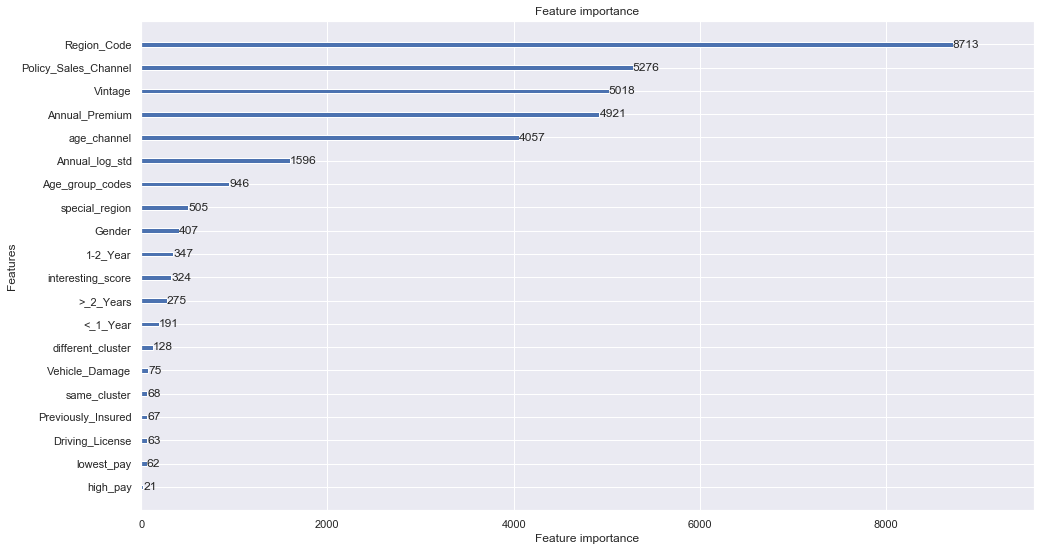

In [279]:
lightgbm.plot_importance(lgb)

# load data

In [92]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
print(f'Train_data shape is {train.shape}\nTest_data shpae is  {test.shape}')

Train_data shape is (381109, 12)
Test_data shpae is  (127037, 11)


## check missing data

In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [609]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

# EDA

In [610]:
# input = dataframe
# output = list of datatpye  -> int,float or category
def data_type(df):

    intlist = []
    floatlist = []
    catelist = []
    for col in df.columns:

        if df[col].dtype == 'int64':
            intlist.append(col)
        elif df[col].dtype == 'float':
            floatlist.append(col)
        else:
            catelist.append(col)
    return intlist, floatlist, catelist

In [611]:
int_list ,float_list ,cate_list = data_type(train)

In [612]:
print(f'Int_feature = {int_list}\n\nFloat_feature = {float_list}\n\nCategory_feature = {cate_list}')

Int_feature = ['id', 'Age', 'Driving_License', 'Previously_Insured', 'Vintage', 'Response']

Float_feature = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']

Category_feature = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


## visualization

### check the target variable (Feature name *Response*)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

C:\Users\USER\Anaconda3\Lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    334399
1     46710
Name: Response, dtype: int64

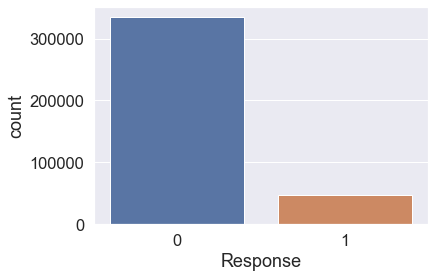

In [614]:
sns.countplot(train['Response'])
train['Response'].value_counts()
# we know there's a litte bit unbalance on this dataset

### cheak the distribution of all columns (float)

C:\Users\USER\Anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\Anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\Anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

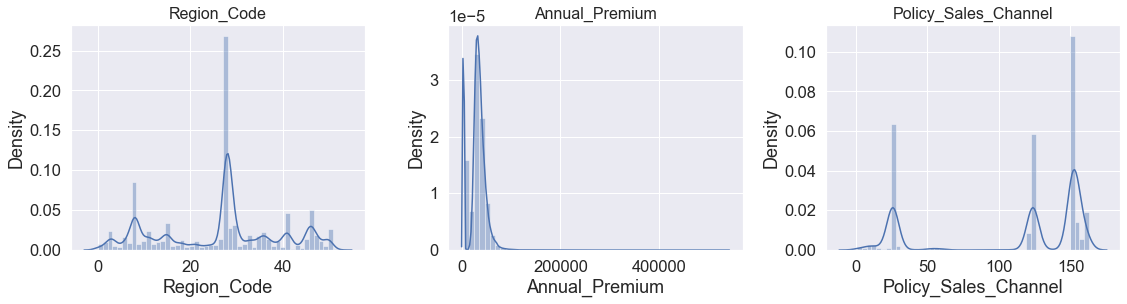

In [615]:
plt.figure(figsize=(16,12))
for count,col in enumerate(float_list) :
    count +=1
    plt.subplot(3,3,count)
    sns.distplot(train[col])
    plt.title(col,fontsize=16)
    plt.tight_layout()
    
# we find region_code and Policy_Sales_Channel changing into int64 are more reasonable

In [616]:
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype('int64')
train['Region_Code'] = train['Region_Code'].astype('int64')

In [617]:
int_list.extend(['Policy_Sales_Channel','Region_Code'])
float_list.remove('Policy_Sales_Channel')
float_list.remove('Region_Code')

In [618]:
len(int_list)

8

### check the distribution of all columns (int)

In [619]:
# age mix annual_premium

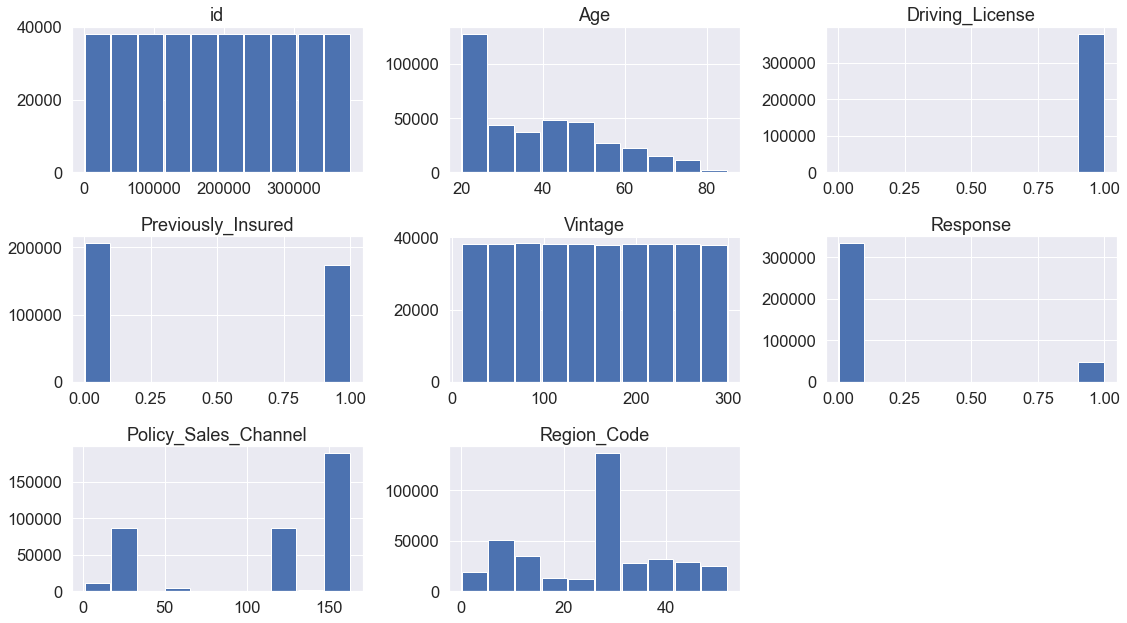

In [620]:
plt.figure(figsize=(16,9))
count=0
for col in int_list:
    count+=1
    plt.subplot(3,3,count)
    plt.hist(train[col],rwidth=0.95)
    plt.title(col)
    plt.tight_layout()

In [621]:
# we can focuse on age,previously_insured, region_code

### check the corr between all features

In [9]:
# translate category data into int or float
from sklearn.preprocessing import LabelEncoder

In [10]:
cate_list

NameError: name 'cate_list' is not defined

In [ ]:
plt.figure(figsize=(16,9))
count = 1
for col in cate_list:
    plt.subplot(1,3,count)
    plt.hist(train[col],rwidth=0.9)
    plt.title(col)
    plt.tight_layout()
    count+=1

In [ ]:
# input : dataframe & the column which you want to label.
# output : label_encoder (object)
def gen_label_encoder(df,target):
    la = LabelEncoder()
    la.fit(df[target])
    
    return la

In [55]:
la_gender.classes_

array(['Female', 'Male'], dtype=object)

In [57]:
dict(zip(la_gender.classes_,la_gender.transform(la_gender.classes_)))

{'Female': 0, 'Male': 1}

In [39]:
la_vehicle_damage.fit_transform(train['Gender'])
#la_vehicle_damage.classes_

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [11]:
la_gender = gen_label_encoder(train,'Gender')
la_vehicle_damage = gen_label_encoder(train,'Vehicle_Damage')

In [17]:
train['Gender'] = la_gender.transform(train['Gender'])
#train['Vehicle_Age'] = la_vehicle_age.transform(train['Vehicle_Age'])
train = pd.concat([train,pd.get_dummies(train['Vehicle_Age'])],axis=1)
train['Vehicle_Damage'] = la_vehicle_damage.transform(train['Vehicle_Damage'])

<AxesSubplot:>

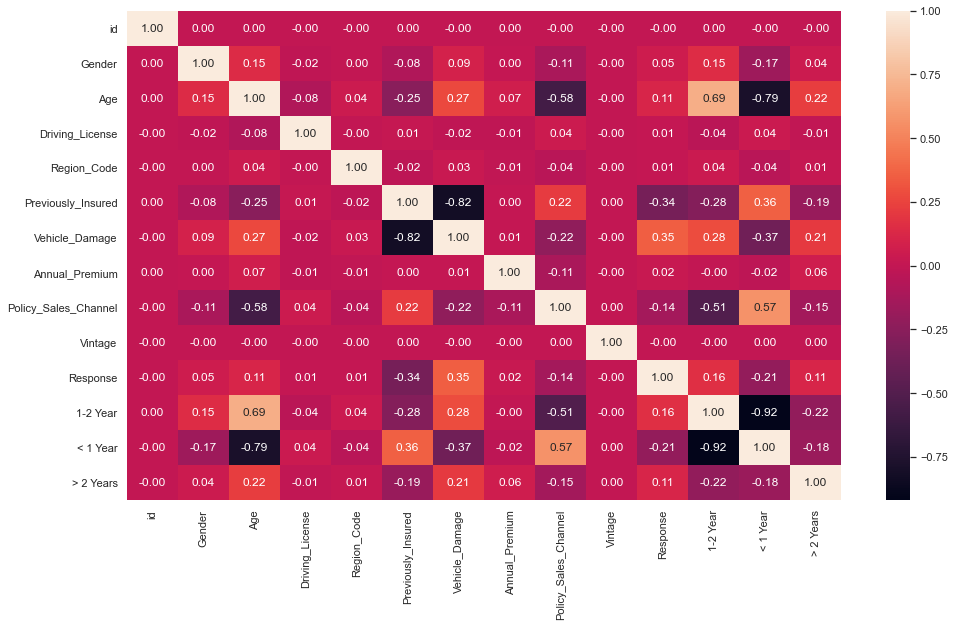

In [628]:
corr = train.corr()
plt.figure(figsize=(16,9))
sns.set(rc={'figure.figsize':(16,9)})
sns.heatmap(corr,annot=True,fmt='.2f')

## check the corr between two features

### check Age and Response

In [629]:
train['Age_group'] = pd.cut(train['Age'],bins=range(10,90,10))

In [630]:
train['Age_group_codes'] = train['Age_group'].cat.codes

In [12]:
def gen_cross_hist(df,feature1,feature2,height=8,ratio=16/8,font_scale =1.8):
    
    df=df.groupby([feature1,feature2])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
    sns.set(font_scale =font_scale)
    g = sns.catplot(x=feature1, y="count",col=feature2,
                    data=df, kind="bar",height=height,aspect=ratio,margin_titles=True)
    # show the pertange on the img
    for img in g.axes[0]:
        for p in img.patches:
            txt = int(p.get_height().round(10))
            txt_x = p.get_x() 
            txt_y = p.get_height()
            img.axes.text(txt_x,txt_y,txt)
    plt.show()

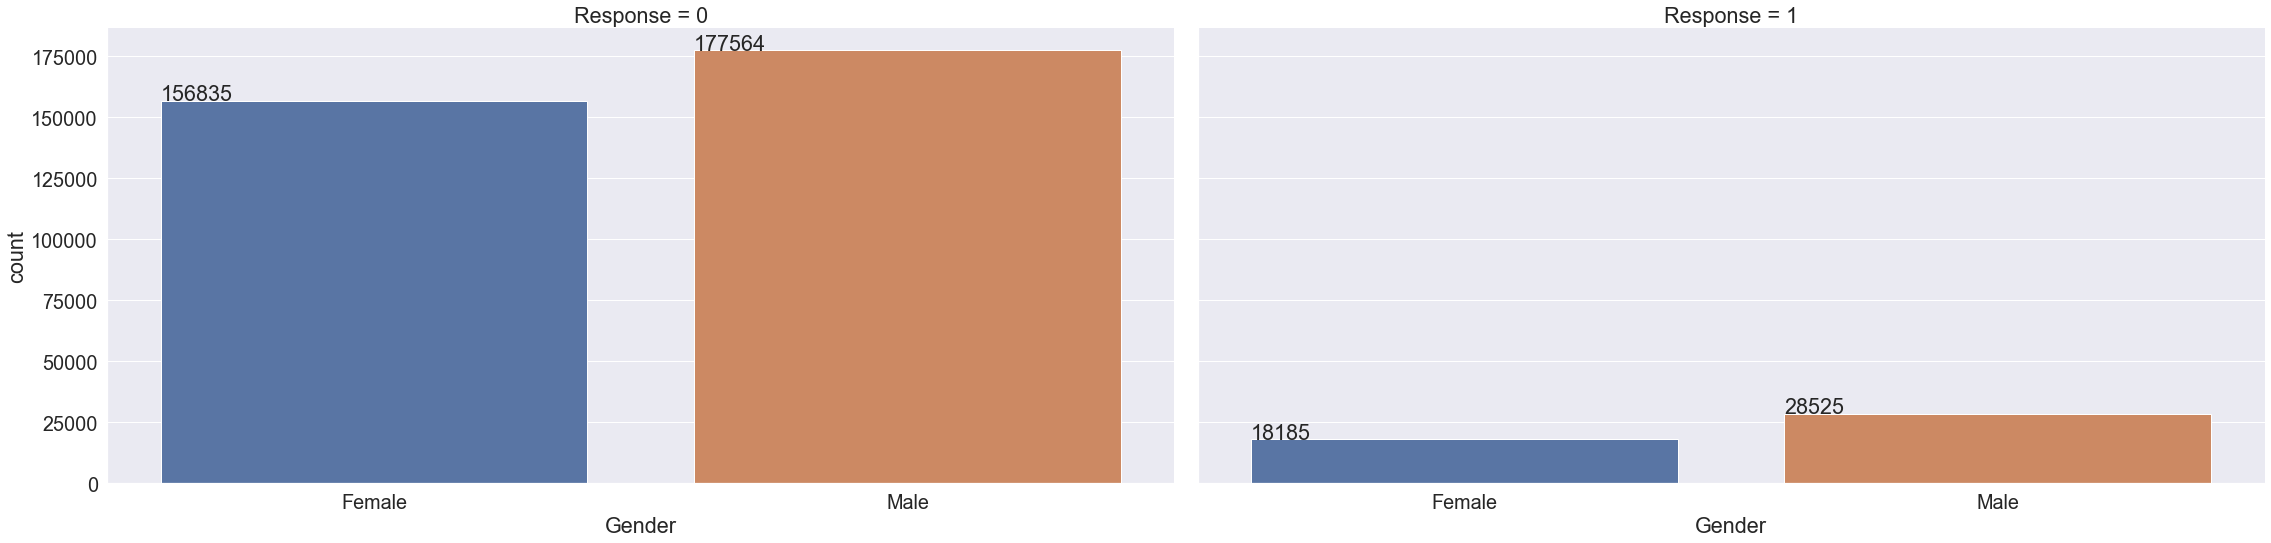

In [15]:
gen_cross_hist(train,'Gender','Response')

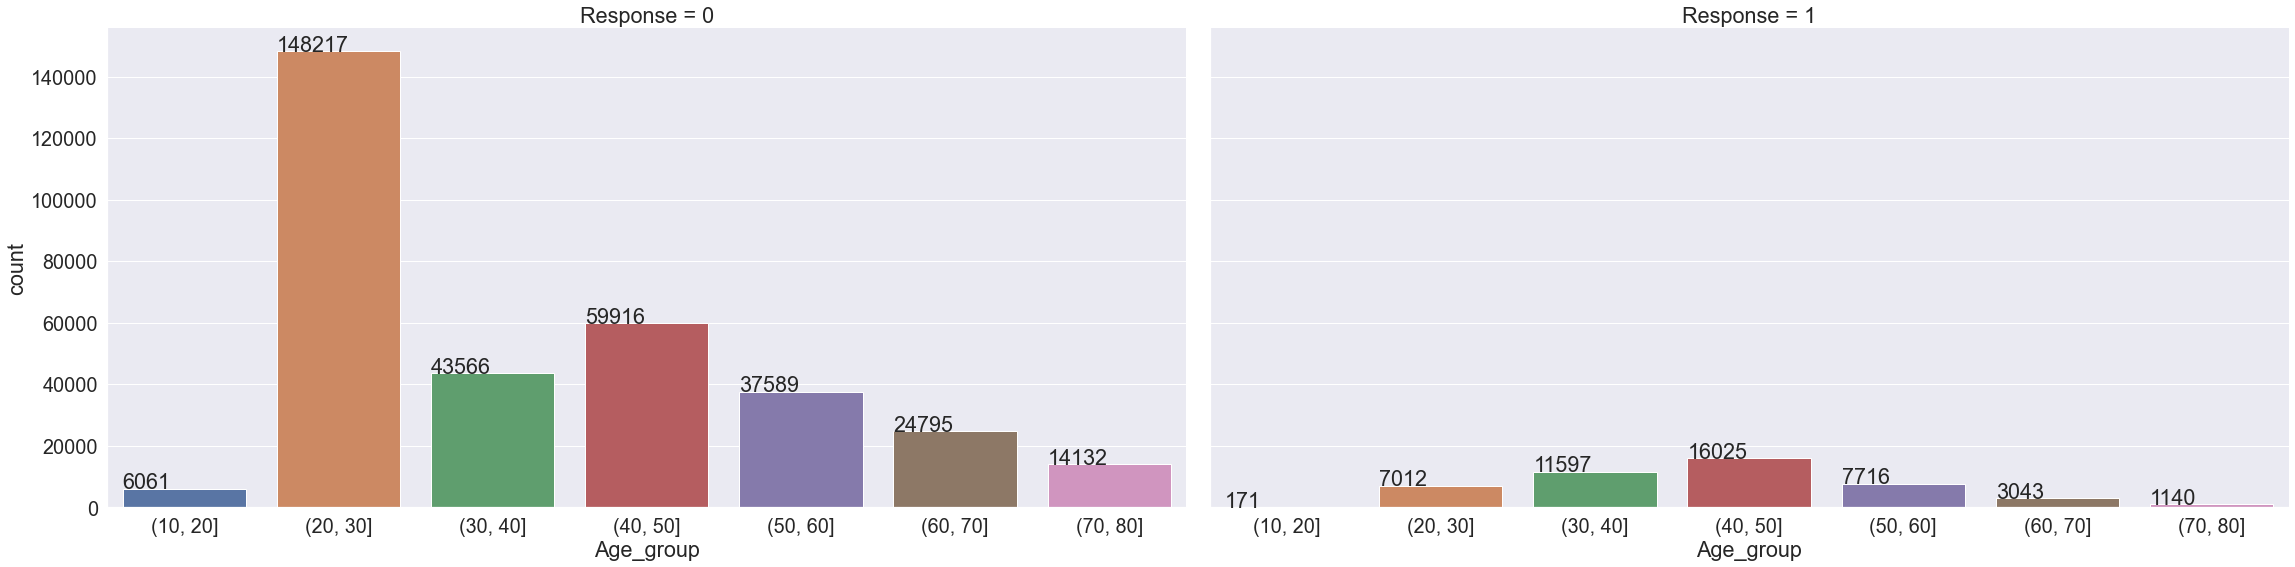

In [632]:
gen_cross_hist(train,'Age_group','Response')

after show theses plot we can know there're very different between response=0 and response=1
in ""

### check vehical_damage and response

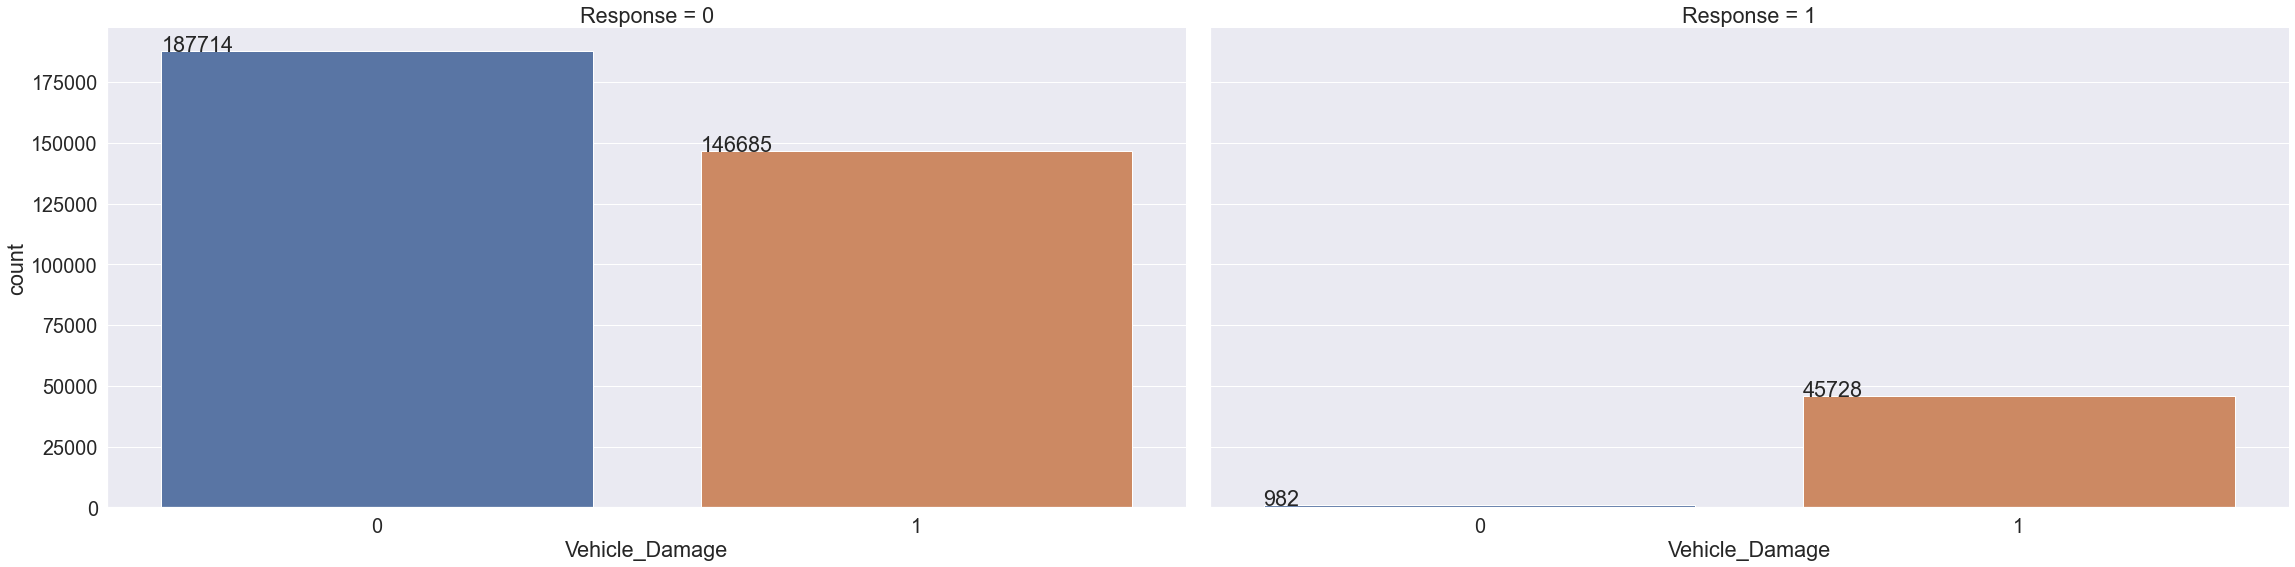

In [633]:
gen_cross_hist(train,'Vehicle_Damage','Response')

We can see there's just very few people with vehicle which without damage will Response the insurance

### Previously_Insured and response

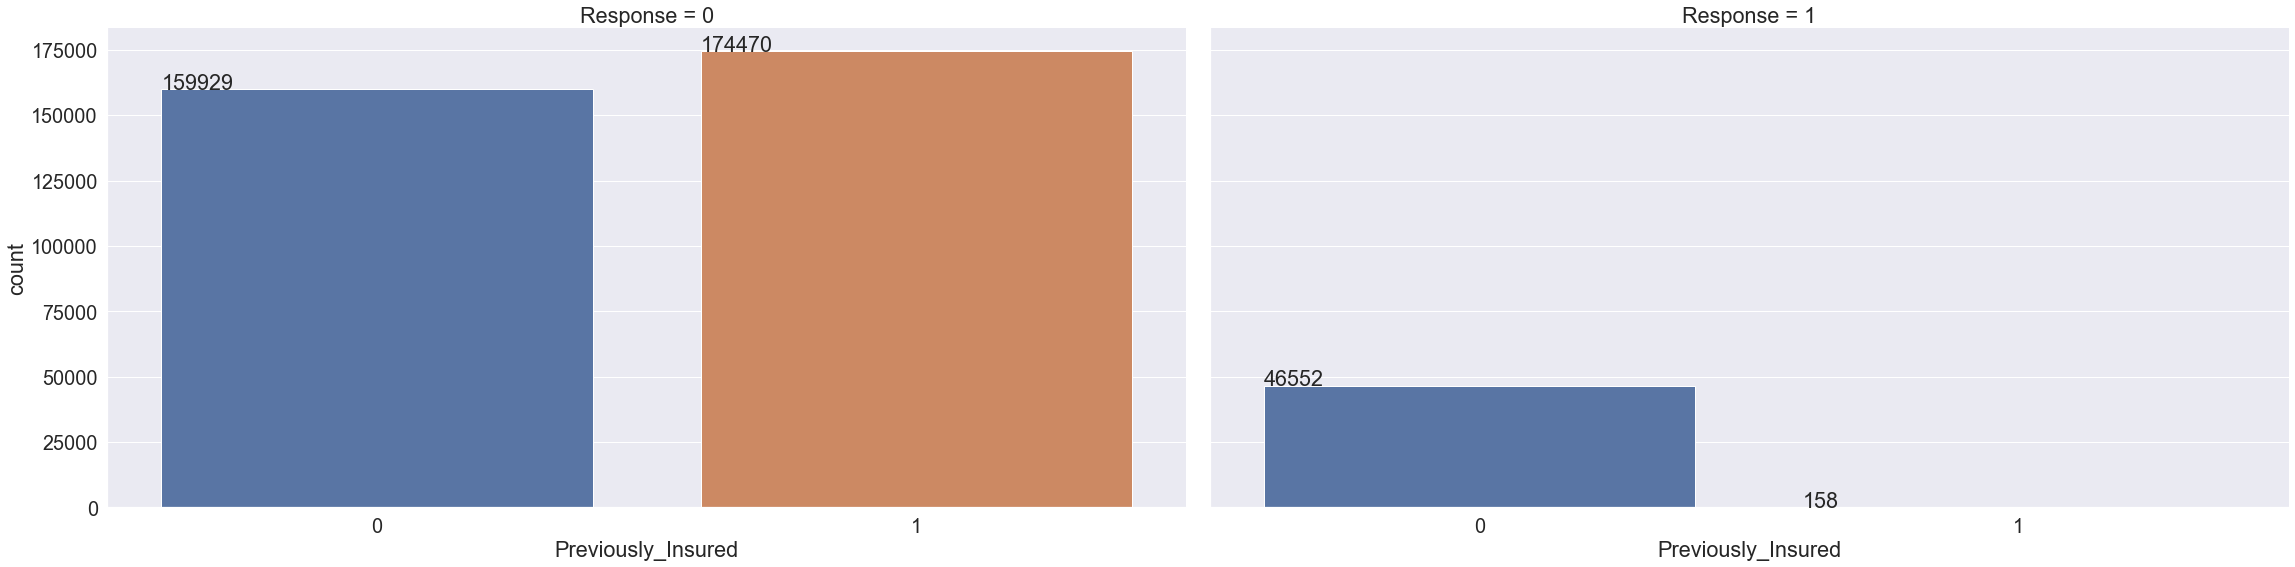

In [323]:
gen_cross_hist(train,'Previously_Insured','Response')

we can see that just few people response if there's already have an insured before

In [324]:
#a = train[(train['Previously_Insured'] == 1) & (train['Response'] == 1)]

### Policy and response

C:\Users\USER\Anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Policy_Sales_Channel & Response=0 '}, xlabel='Policy_Sales_Channel', ylabel='Density'>

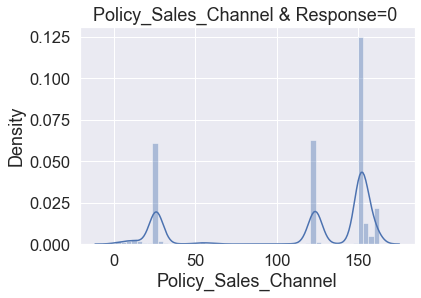

In [325]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5) 
plt.title('Policy_Sales_Channel & Response=0 ')
sns.distplot(train[train['Response'] == 0]['Policy_Sales_Channel'])

C:\Users\USER\Anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Policy_Sales_Channel & Response=1 '}, xlabel='Policy_Sales_Channel', ylabel='Density'>

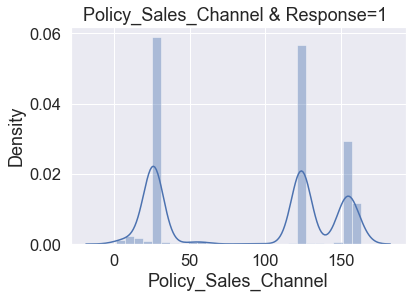

In [326]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5) 
plt.title('Policy_Sales_Channel & Response=1 ')
sns.distplot(train[train['Response'] == 1]['Policy_Sales_Channel'])

In [426]:
# 用蛋黃區來解釋操作

### vehicle_age and response

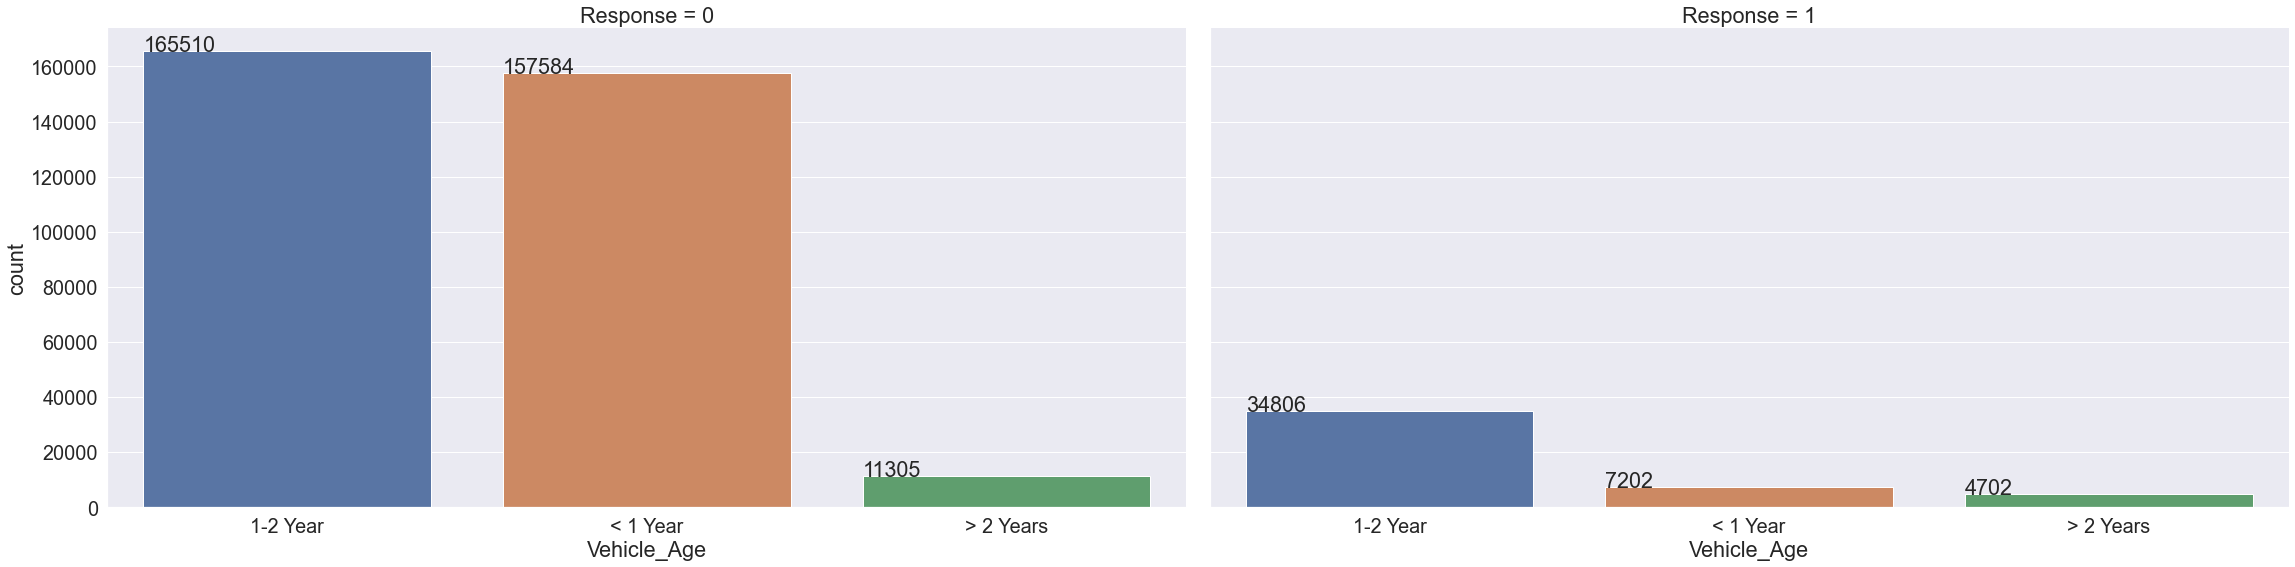

In [327]:
gen_cross_hist(train,'Vehicle_Age','Response')

it shows there's not quit different between vehicle age

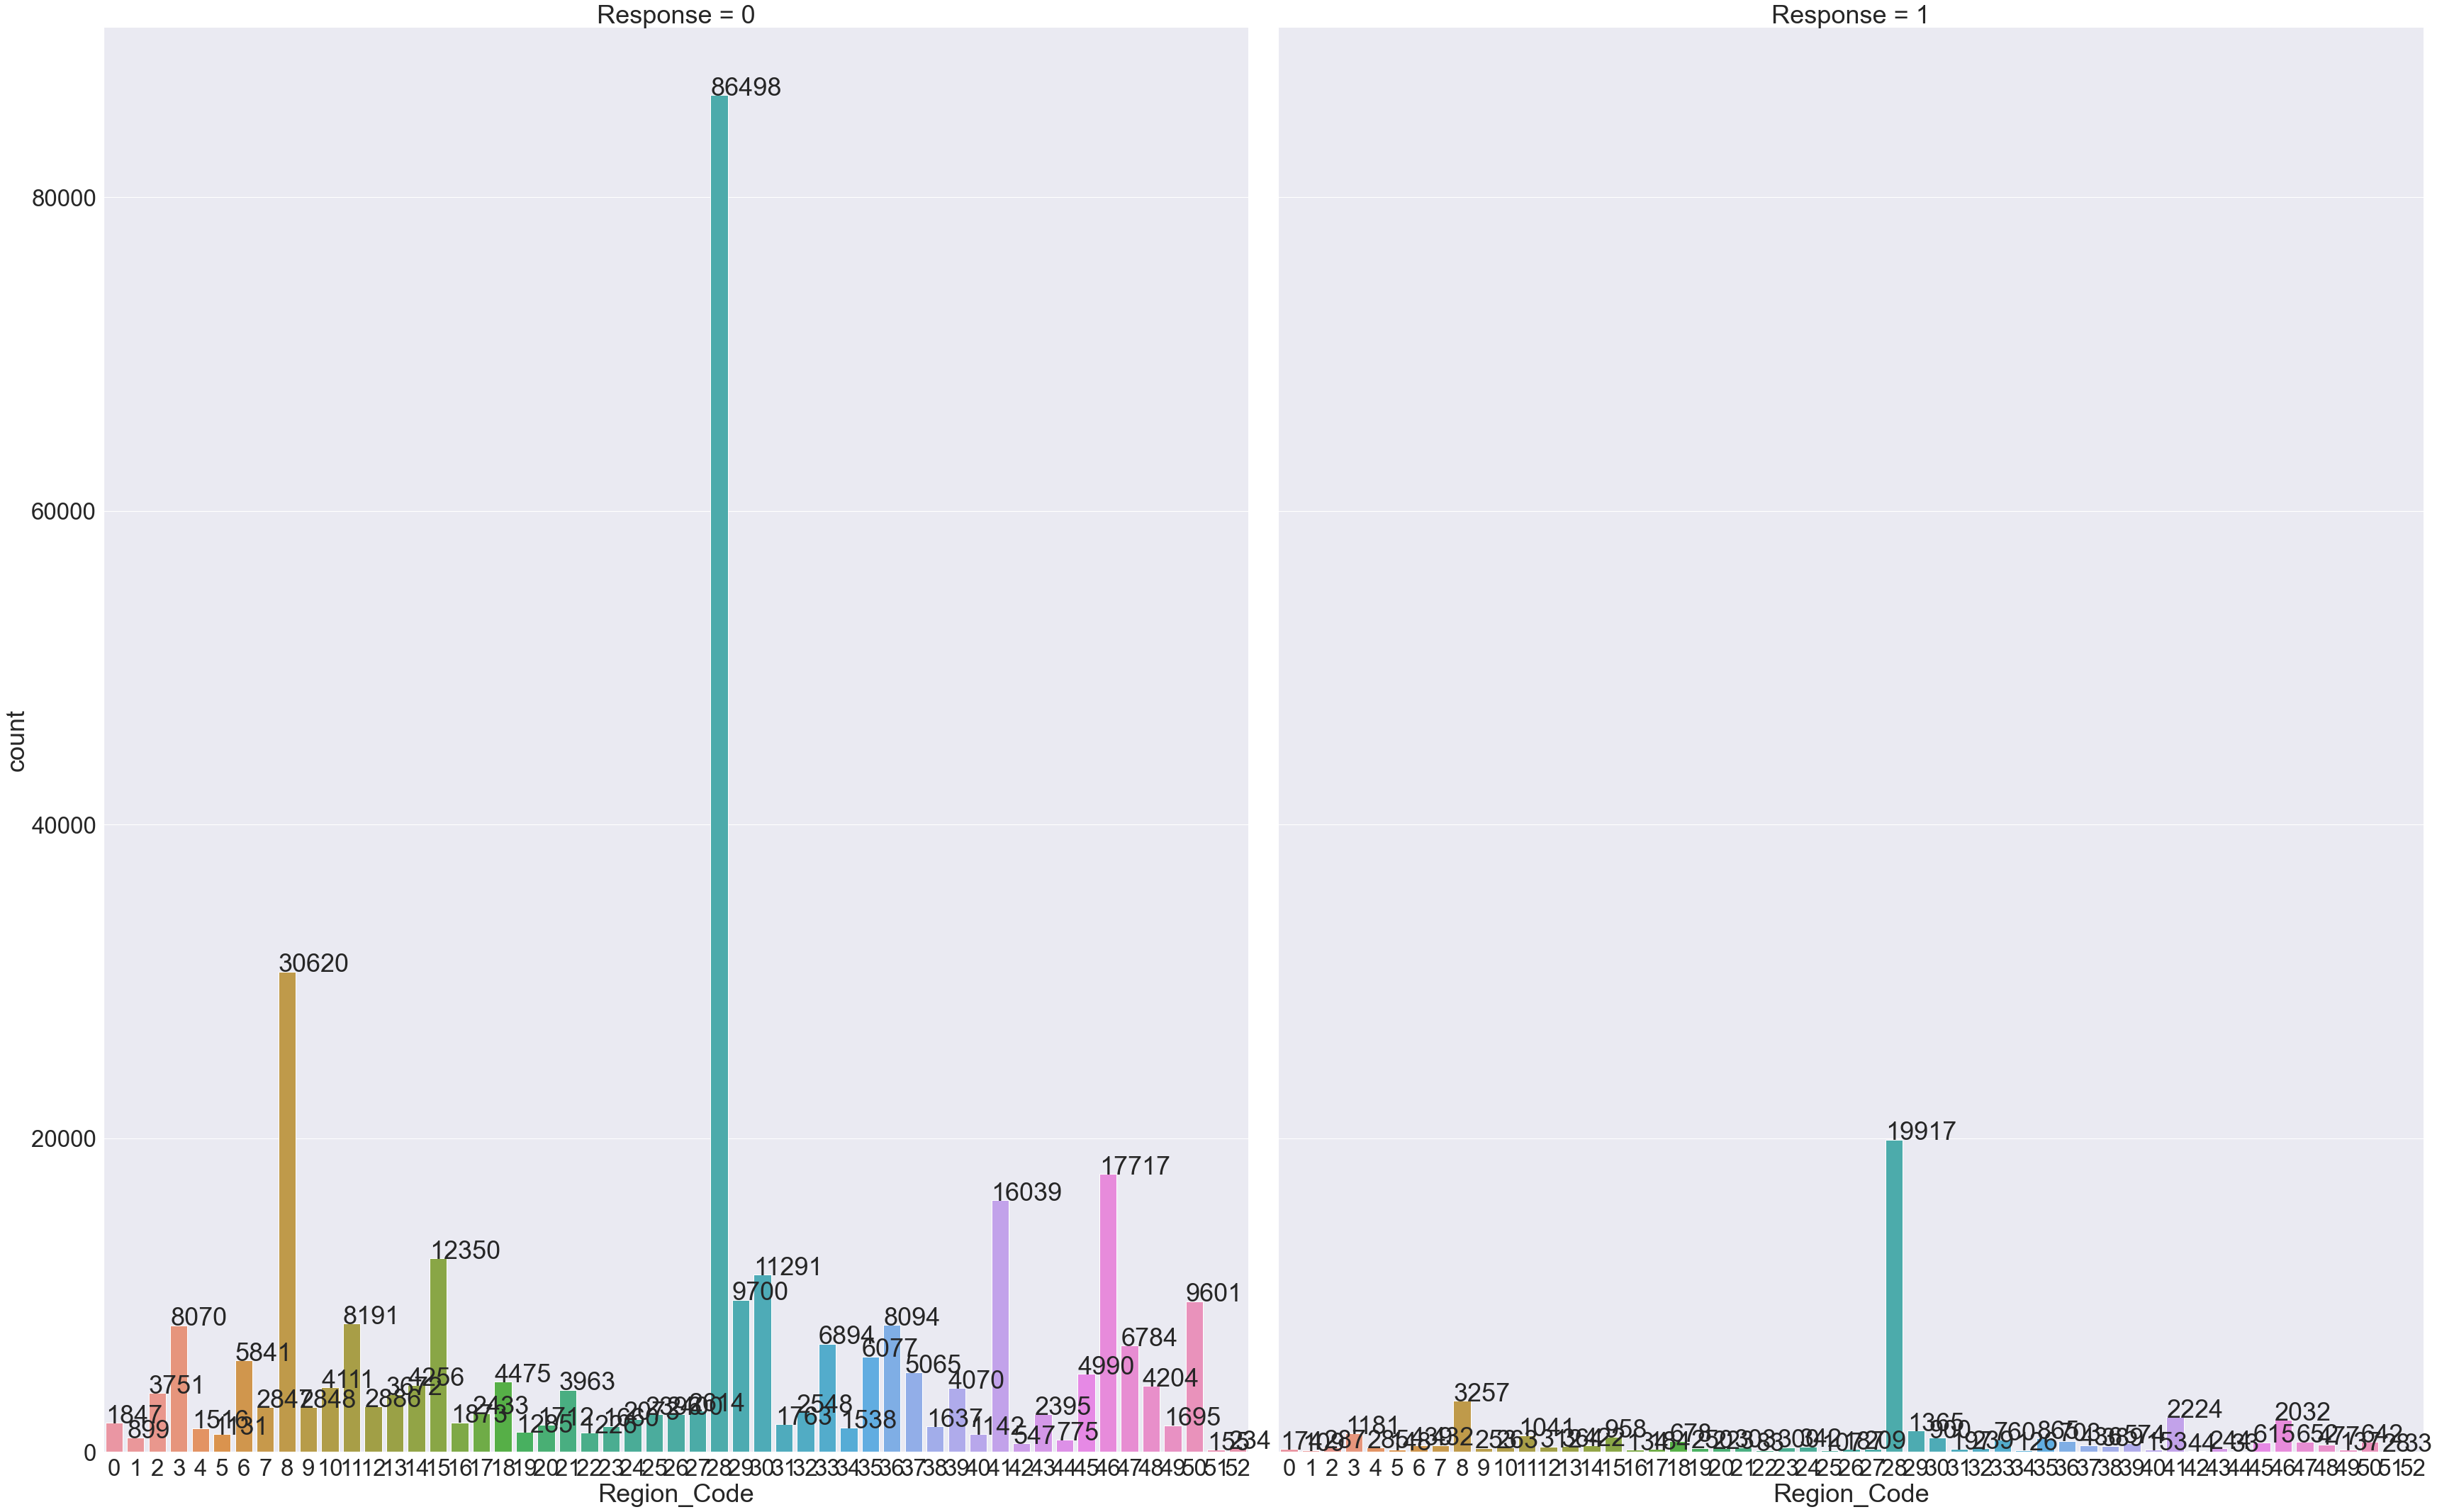

In [328]:
gen_cross_hist(train,'Region_Code','Response',height=30,ratio=0.8,font_scale=3)

In [634]:
res_0 = train[train['Response']==0]['Region_Code'].value_counts().index[:5]
res_1 = train[train['Response']==1]['Region_Code'].value_counts().index[:5]
print(f'Top 5 Region in response==0 {list(res_0)} \nTop 5 Region in rsponse==1 {list(res_1)}')

Top 5 Region in response==0 [28, 8, 46, 41, 15] 
Top 5 Region in rsponse==1 [28, 8, 41, 46, 29]


C:\Users\USER\Anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Vintage & Response=0 '}, xlabel='Vintage', ylabel='Density'>

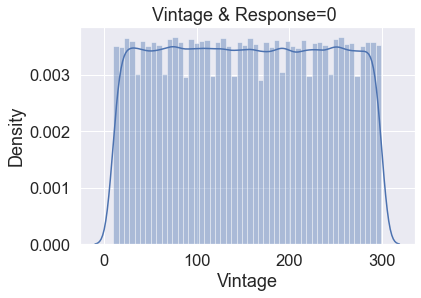

In [635]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5) 
plt.title('Vintage & Response=0 ')
sns.distplot(train[train['Response'] == 0]['Vintage'])

C:\Users\USER\Anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Vintage & Response=1'}, xlabel='Vintage', ylabel='Density'>

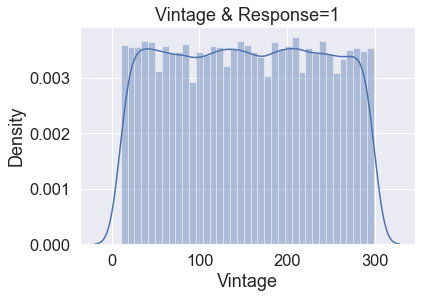

In [636]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(font_scale=1.5) 
plt.title('Vintage & Response=1')
sns.distplot(train[train['Response'] == 1]['Vintage'])

<AxesSubplot:xlabel='Age', ylabel='Policy_Sales_Channel'>

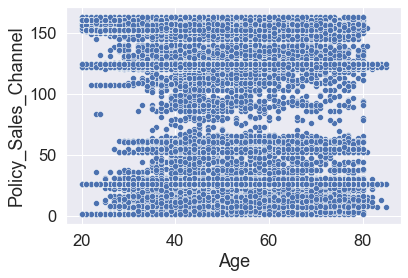

In [639]:
sns.scatterplot(x=train[train['Response']==0]['Age'],y=train[train['Response']==0]['Policy_Sales_Channel'])

<AxesSubplot:xlabel='Age', ylabel='Policy_Sales_Channel'>

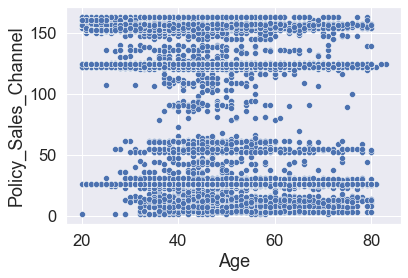

In [640]:
sns.scatterplot(x=train[train['Response']==1]['Age'],y=train[train['Response']==1]['Policy_Sales_Channel'])

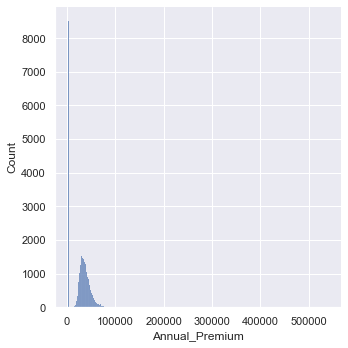

In [905]:
sns.set(rc={'figure.figsize':(16,9)})
sns.displot((train[train['Response']==1]['Annual_Premium']))

In [907]:
train['Annual_Premium'].value_counts()

2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64

# feature engineering

根據上面EDA結果可以得知:

特徵: Vehicle_Damage, Previously_Insured, Age_group_codes,Region_Code 在response=1 上面表現顯著和 response=0 不同，因此可以加強這些特徵的patten 來協助模型預測response=1的人的行為

## gen special cluster

In [641]:
train['interesting_score'] = train['Vehicle_Damage'] - train['Previously_Insured']

In [642]:
train[train['Response']==1]['Region_Code'].value_counts().index[:10]

Int64Index([28, 8, 41, 46, 29, 3, 11, 15, 30, 35], dtype='int64')

In [643]:
train[train['Response']==0]['Region_Code'].value_counts().index[:10]

Int64Index([28, 8, 46, 41, 15, 30, 29, 50, 11, 36], dtype='int64')

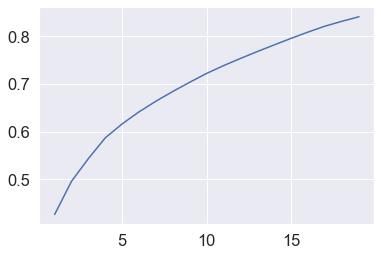

In [644]:
ans = []
for i in range(1,20):
    ans.append(train[train['Response']==1]['Region_Code'].value_counts()[:i].sum() / train[train['Response']==1]['Region_Code'].value_counts().sum())
plt.plot(list(range(1,20)),ans)

In [71]:
train['special_region'] = 0

special_num = list(train[train['Response']==1]['Region_Code'].value_counts().index[:15])

for region in special_num:
    special = train[train['Region_Code'] == region].index
    train.loc[special,'special_region'] =1

In [72]:
train['special_region']

0         1
1         1
2         1
3         1
4         1
         ..
381104    0
381105    0
381106    1
381107    0
381108    1
Name: special_region, Length: 381109, dtype: int64

In [646]:
train['age_channel'] = train['Age_group_codes'].astype('str') + train['Policy_Sales_Channel'].astype('str')
age_channel_la = gen_label_encoder(train,'age_channel')
train['age_channel'] = age_channel_la.fit_transform(train['age_channel'])

## make the distribution like normal distribution

<AxesSubplot:ylabel='Annual_Premium'>

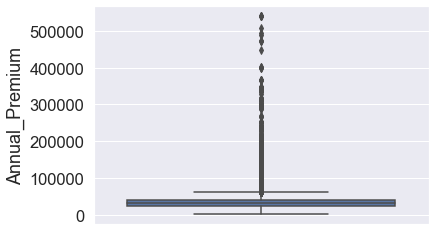

In [647]:
sns.boxplot(y = 'Annual_Premium', data = train)

In [648]:
train['Annual_log_std'] = np.log1p(train['Annual_Premium'])

In [908]:
train['lowest_pay'] = 0
low_idx = train[train['Annual_Premium'] == train['Annual_Premium'].min()].index
train.loc[low_idx,'lowest_pay'] = 1

In [ ]:
train['high_pay'] = 0
high_idx = train[train['Annual_Premium'] >= (train['Annual_Premium'].mean() + 1.5*train['Annual_Premium'].std())].index
train.loc[high_idx,'high_pay'] = 1

## use PCA to check my idea that the perform between response=0 and 1

In [649]:
from sklearn.decomposition import PCA,SparsePCA,KernelPCA,NMF

In [650]:
VariablesNoTarget = list(train.columns)

In [659]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', '1-2 Year', '< 1 Year',
       '> 2 Years', 'Age_group', 'Age_group_codes', 'interesting_score',
       'special_region', 'age_channel', 'Annual_log_std'],
      dtype='object')

In [652]:
train_pca = train[VariablesNoTarget].drop(['Age_group','interesting_score','Vehicle_Age','id','Response'],axis=1)

In [653]:
pca = PCA()
pca.fit_transform(train_pca)

array([[ 9.88969671e+03, -8.17824434e+01,  6.27499852e+01, ...,
         1.58612749e-01,  4.69064316e-04,  2.98716449e-12],
       [ 2.97200688e+03, -4.71166120e+02,  2.88788539e+01, ...,
         5.66881111e-02, -1.49657112e-02,  9.30827923e-13],
       [ 7.72969826e+03, -8.39259459e+01, -1.27255495e+02, ...,
         1.95004560e-01, -9.84572195e-04, -2.57489190e-15],
       ...,
       [ 4.55347854e+03,  1.53819548e+02,  6.58678750e+00, ...,
         1.99604815e-02,  1.33968491e-03, -3.13703909e-19],
       [ 1.40528380e+04, -2.81618805e+02, -8.02098941e+01, ...,
         1.29714174e-01, -7.78989731e-03, -3.26371671e-16],
       [ 1.12126963e+04, -8.08313216e+01,  8.27527105e+01, ...,
         8.58894375e-02, -3.37790091e-03, -8.36564995e-17]])

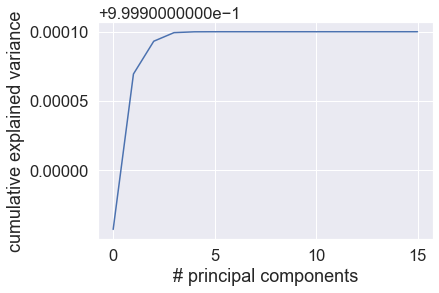

In [654]:
cum_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

C:\Users\USER\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


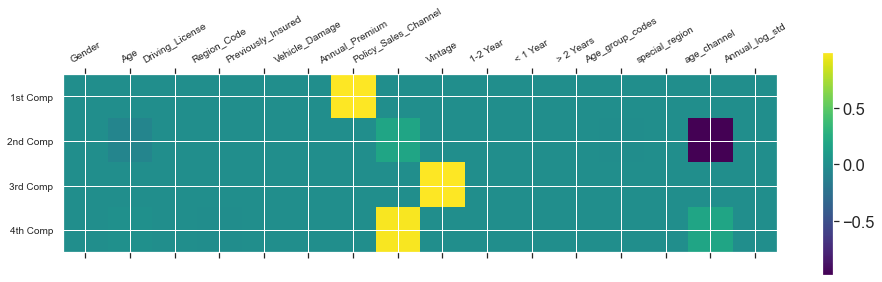

In [655]:
pca = PCA(4).fit(train_pca)

X_pca=pca.transform(train_pca)

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['1st Comp','2nd Comp','3rd Comp','4th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(list(range(len(train_pca.columns))),train_pca.columns,fontsize=10,rotation=30)
plt.tight_layout()
plt.show()

In [23]:
from sklearn import metrics, mixture, cluster, datasets
from sklearn.mixture import GaussianMixture

In [19]:
from sklearn.preprocessing import MinMaxScaler

pca 之前一定要先做標準話

In [21]:
minmax = MinMaxScaler()
a= minmax.fit_transform(np.array(train[['Policy_Sales_Channel','Region_Code','Age','Previously_Insured','Vehicle_Damage']]))
minmax1 = MinMaxScaler()
b= minmax1.fit_transform(np.array(train[['Annual_Premium','Gender','Vintage','1-2 Year', '< 1 Year','> 2 Years']]))

Text(0.5, 18.750000000000004, 'n_components')

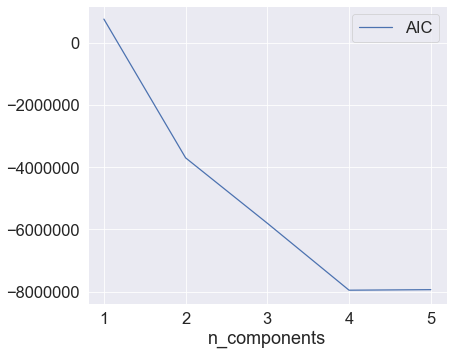

In [24]:
X = a

GM_n_components = np.arange(1, 6)
GM_models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in GM_n_components]

plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
plt.plot(GM_n_components, [m.aic(X) for m in GM_models], label='AIC')
plt.tight_layout()
plt.legend(loc='best')
plt.xlabel('n_components')

In [26]:
GM_n_classes = 2

GMcluster = mixture.GaussianMixture(n_components=GM_n_classes, covariance_type='full',random_state = 0)
GMcluster_fit = GMcluster.fit(a)
GMlabels = GMcluster_fit.predict(a)

In [27]:
train['GM_Cluster_a'] = GMlabels

Text(0.5, 18.750000000000004, 'n_components')

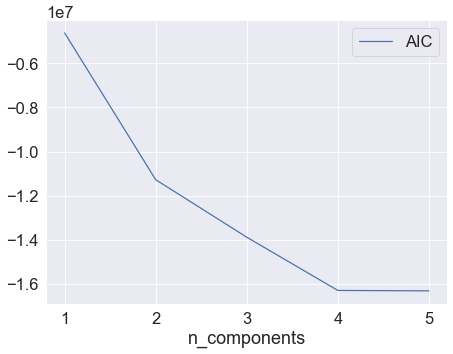

In [28]:
X = b

GM_n_components = np.arange(1, 6)
GM_models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in GM_n_components]

plt.figure(num=None, figsize=(8, 6), dpi=60, facecolor='w', edgecolor='r')
plt.plot(GM_n_components, [m.aic(X) for m in GM_models], label='AIC')
plt.tight_layout()
plt.legend(loc='best')
plt.xlabel('n_components')

In [29]:
GM_n_classes = 2

GMcluster = mixture.GaussianMixture(n_components=GM_n_classes, covariance_type='full',random_state = 0)
GMcluster_fit = GMcluster.fit(b)
GMlabels = GMcluster_fit.predict(b)

In [30]:
train['GM_Cluster_b'] = GMlabels

# modeling

In [686]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', '1-2 Year', '< 1 Year',
       '> 2 Years', 'Age_group', 'Age_group_codes', 'interesting_score',
       'special_region', 'age_channel', 'Annual_log_std', 'GM_Cluster_a',
       'GM_Cluster_b'],
      dtype='object')

In [688]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', '1-2 Year', '< 1 Year',
       '> 2 Years', 'Age_group', 'Age_group_codes', 'interesting_score',
       'special_region', 'age_channel', 'Annual_log_std', 'GM_Cluster_a',
       'GM_Cluster_b'],
      dtype='object')

In [689]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  int64   
 1   Gender                381109 non-null  int32   
 2   Age                   381109 non-null  int64   
 3   Driving_License       381109 non-null  int64   
 4   Region_Code           381109 non-null  int64   
 5   Previously_Insured    381109 non-null  int64   
 6   Vehicle_Age           381109 non-null  object  
 7   Vehicle_Damage        381109 non-null  int32   
 8   Annual_Premium        381109 non-null  float64 
 9   Policy_Sales_Channel  381109 non-null  int64   
 10  Vintage               381109 non-null  int64   
 11  Response              381109 non-null  int64   
 12  1-2 Year              381109 non-null  uint8   
 13  < 1 Year              381109 non-null  uint8   
 14  > 2 Years             381109 non-nul

In [690]:
from sklearn.model_selection import train_test_split

In [911]:
Target= train['Response']
#df_final_ = train.drop(['id','Annual_Premium','Age_group_codes','Age_group','Age_group_spceial_codes','Age_group_spceial','Response'],axis=1)
df_final_ = train.drop(['id','Vehicle_Age','Age_group','Response'],axis=1)

#df_final_ = df_final_.drop(['Annual_log_std','GM_Cluster_a','GM_Cluster_b','age_channel','special_region','interesting_score','Age_group_codes'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_final_,Target,test_size=0.2,random_state=1102)

# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_train,y_train=oversample.fit_resample(x_train,y_train)

In [220]:
#import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

In [805]:
df_final_ = df_final_.drop(['Annual_log_std','GM_Cluster_a','GM_Cluster_b','age_channel','special_region','interesting_score','Age_group_codes'],axis=1)

In [915]:
from sklearn.model_selection import StratifiedKFold

lgb = LGBMClassifier(
    n_estimators=1000,
    depth=10,
    learning_rate=0.02,
    metric='auc',
    is_unbalance=True,
    #reg_lambda=0.36840551125265786,
    #subsample=0.7878004985705472,
    colsample_bytree=0.8,
    reg_lambda=2,
    reg_alpha=2,
    random_state=42,
    n_jobs=-1)  # The parameter here are selected by manual tuning

fold = StratifiedKFold(n_splits=5, shuffle=True)
pred = []
score = []
for train_index, test_index in fold.split(df_final_, Target):
    X_train, X_test = df_final_.iloc[train_index], df_final_.iloc[test_index]
    Y_train, Y_test = Target.iloc[train_index], Target.iloc[test_index]

    lgb = lgb.fit(X_train,
                  Y_train,
                  eval_metric='auc',
                  eval_set=(X_test, Y_test),
                  verbose=200,
                  early_stopping_rounds=100)
    pred_proba = lgb.predict_proba(X_test)[:, 1]
    score.append(roc_auc_score(Y_test, pred_proba))

Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.856711
[400]	valid_0's auc: 0.857353
[600]	valid_0's auc: 0.857502
[800]	valid_0's auc: 0.857534
Early stopping, best iteration is:
[765]	valid_0's auc: 0.857555
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.858185
[400]	valid_0's auc: 0.858788
Early stopping, best iteration is:
[491]	valid_0's auc: 0.858819
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.855515
[400]	valid_0's auc: 0.856233
[600]	valid_0's auc: 0.8565
Early stopping, best iteration is:
[654]	valid_0's auc: 0.85654
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.85998
[400]	valid_0's auc: 0.860709
[600]	valid_0's auc: 0.860892
Early stopping, best iteration is:
[627]	valid_0's auc: 0.86093
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.855908
[400]	valid_0's auc: 0.856918
[600]	valid_0's

In [916]:
print("Mean AUC ",np.array(score).mean())
print("Max AUC ", np.array(score).max())

Mean AUC  0.8582919502937768
Max AUC  0.8609303832424744


In [804]:
print("Mean AUC ",np.array(score).mean())
print("Max AUC ", np.array(score).max())

Mean AUC  0.8436194944575888
Max AUC  0.8438193935146767


In [836]:
xgb_c = LGBMClassifier(colsample_bytree=0.8,
                       is_unbalance=True,
                       max_depth=9,
                       n_estimators=300,
                       reg_alpha=10,
                       reg_lambda=0.36840551125265786,
                       subsample=0.7878004985705472,
                       eval_metric='auc')

In [837]:
def model_eval(algo,  X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test):
    algo.fit(X_train, y_train,eval_set = [(x_test, y_test)],
                early_stopping_rounds=50,verbose = 1000)
    
    #train datset
    y_train_pred = algo.predict(X_train)
    y_train_proba = algo.predict_proba(X_train)[::, 1]

    print('Train dataset :')
    print('Confusion matrix :\n', confusion_matrix(y_train, y_train_pred))
    print('Accuracy :',accuracy_score(y_train, y_train_pred) )
    print('AUC score :', roc_auc_score(y_train, y_train_proba))
    print('F1-score :', f1_score(y_train, y_train_pred))
    print('Precision score :', precision_score(y_train, y_train_pred))
    print('Recall score :', recall_score(y_train, y_train_pred))
    
    #test datset
    y_test_pred = algo.predict(X_test)
    y_test_proba = algo.predict_proba(X_test)[::, 1]
    print('\n\nTest dataset :')
    print('Confusion matrix :\n', confusion_matrix(y_test, y_test_pred))
    print('Accuracy :',accuracy_score(y_test, y_test_pred) )
    print('AUC score :', roc_auc_score(y_test, y_test_proba))
    print('F1-score :', f1_score(y_test, y_test_pred))
    print('Precision score :', precision_score(y_test, y_test_pred))
    print('Recall score :', recall_score(y_test, y_test_pred))
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    print ('Area under curve (AUC): ', format(round(auc(fpr,tpr),5)))

    #xgb.plot_importance(algo)

In [838]:
model_eval(xgb_c)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.31984
Train dataset :
Confusion matrix :
 [[267310      0]
 [ 37577      0]]
Accuracy : 0.8767510585889198
AUC score : 0.8517219376336127
F1-score : 0.0
Precision score : 0.0
Recall score : 0.0


C:\Users\USER\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Test dataset :
Confusion matrix :
 [[67089     0]
 [ 9133     0]]
Accuracy : 0.8801789509590408
AUC score : 0.8516353159278182
F1-score : 0.0
Precision score : 0.0
Recall score : 0.0
Area under curve (AUC):  0.85164


In [851]:
model_eval(xgb_c)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.31984
Train dataset :
Confusion matrix :
 [[267310      0]
 [ 37577      0]]
Accuracy : 0.8767510585889198
AUC score : 0.8517219376336127
F1-score : 0.0
Precision score : 0.0
Recall score :

C:\Users\USER\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.0


Test dataset :
Confusion matrix :
 [[67089     0]
 [ 9133     0]]
Accuracy : 0.8801789509590408
AUC score : 0.8516353159278182
F1-score : 0.0
Precision score : 0.0
Recall score : 0.0
Area under curve (AUC):  0.85164


In [852]:
lgb.plot_importance(xgb_c)

AttributeError: 'LGBMClassifier' object has no attribute 'plot_importance'

In [721]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
import lightgbm as lgb

In [785]:
space = {
    'max_depth':
    hp.choice('max_depth', np.arange(5, 20, 1, dtype=int)),
    'min_child_weight':
    hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    'gamma':
    hp.uniform('gamma', 1, 9),
    'colsample_bytree':
    hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    'reg_alpha':
    hp.quniform('reg_alpha', 40, 180, 1),
    'reg_lambda':
    hp.uniform('reg_lambda', 0, 1),
    'subsample':
    hp.uniform('subsample', 0.7, 1),
    'n_estimators':
    hp.choice('n_estimators', np.arange(300, 3000, 500, dtype=int)),
}

In [786]:
def objective(space):
    clf = LGBMClassifier(n_estimators=500,is_unbalance=True,
                         reg_alpha = int(space['reg_alpha']),
                         gamma = space['gamma'],
                         reg_lambda=space['reg_lambda'],
                         max_depth=int(space['max_depth']),
                         min_child_weight=int(space['min_child_weight']),
                         colsample_bytree=(space['colsample_bytree']),
                         subsample=float(space['subsample']))

    fold = StratifiedKFold(n_splits=5, shuffle=True)
    pred = []
    score = []
    for train_index, test_index in fold.split(df_final_, Target):
        X_train, X_test = df_final_.iloc[train_index], df_final_.iloc[
            test_index]
        y_train, y_test = Target.iloc[train_index], Target.iloc[test_index]

        light = clf.fit(X_train,
                        y_train,
                        eval_metric='auc',
                        eval_set=(X_test, y_test),
                        verbose=100,
                        early_stopping_rounds=50)
        pred_proba = light.predict_proba(X_test)[:, 1]
        score.append(roc_auc_score(y_test, pred_proba))

    print("Mean AUC ", np.array(score).mean())
    print("Max AUC ", np.array(score).max())
    return {'loss': -np.array(score).mean(), 'status': STATUS_OK}

In [787]:
trials = Trials()

In [788]:
best_hyperparams = fmin(fn = objective,space = space,algo = tpe.suggest,max_evals = 100,trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.837609	valid_0's binary_logloss: 0.324033
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.837859	valid_0's binary_logloss: 0.323929
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.838328	valid_0's binary_logloss: 0.324004
Training until validation scores don't improve for 50 rounds                               

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.841062	valid_0's binary_logloss: 0.324137
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.839716	valid_0's binary_logloss: 0.324404
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.841477	valid_0's binary_logloss: 0.32404
Training until validation scores don't improve for 50 rounds                                

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.844962	valid_0's binary_logloss: 0.323458
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.840144	valid_0's binary_logloss: 0.323486
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.843704	valid_0's binary_logloss: 0.323142
Mean AUC                                                                                   

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.84349	valid_0's binary_logloss: 0.323516
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.842592	valid_0's binary_logloss: 0.32314
Mean AUC                                                                                                               
0.8442600811286323                                                                                                     
Max AUC                                                                                                                
0.846742955458397                   

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.84503	valid_0's binary_logloss: 0.323034
Mean AUC                                                                                                               
0.8447318984755509                                                                                                     
Max AUC                                                                                                                
0.8462902711003657                                                                                                     
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                

Mean AUC                                                                                                               
0.8455806986946335                                                                                                     
Max AUC                                                                                                                
0.8469919499413053                                                                                                     
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.839704	valid_0's binary_logloss: 0.324471
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                               

Max AUC                                                                                                                
0.8488115679152339                                                                                                     
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.841904	valid_0's binary_logloss: 0.324527
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.842229	valid_0's binary_logloss: 0.325003
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.846659	valid_0's binary_logloss: 0.322912
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.842361	valid_0's binary_logloss: 0.323533
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.845852	valid_0's binary_logloss: 0.322622
Training until validation scores don't improve for 50 rounds                               

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.846621	valid_0's binary_logloss: 0.323211
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.84615	valid_0's binary_logloss: 0.323218
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.845732	valid_0's binary_logloss: 0.323286
Training until validation scores don't improve for 50 rounds                                

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.846592	valid_0's binary_logloss: 0.323199
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.841883	valid_0's binary_logloss: 0.323905
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.844804	valid_0's binary_logloss: 0.32346
Mean AUC                                                                                    

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.844846	valid_0's binary_logloss: 0.323612
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.847044	valid_0's binary_logloss: 0.323145
Mean AUC                                                                                                               
0.8468373923684961                                                                                                     
Max AUC                                                                                                                
0.8485484615575694                

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.842462	valid_0's binary_logloss: 0.323296
Mean AUC                                                                                                               
0.8438364535298548                                                                                                     
Max AUC                                                                                                                
0.8449732844300935                                                                                                     
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                               

Mean AUC                                                                                                               
0.8411033647648326                                                                                                     
Max AUC                                                                                                                
0.8429222609998679                                                                                                     
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3]	valid_0's auc: 0.843583	valid_0's binary_logloss: 0.323558
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                               

In [66]:
a = dict(zip(la_gender.classes_,la_gender.transform(la_gender.classes_)))

In [63]:
la_gender.transform(la_gender.classes_)

array([0, 1])

In [69]:
train['Vehicle_Damage']

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    1
381108    0
Name: Vehicle_Damage, Length: 381109, dtype: int32

In [70]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', '1-2 Year', '< 1 Year',
       '> 2 Years', 'GM_Cluster_a', 'GM_Cluster_b'],
      dtype='object')

In [77]:
b  = [1,2,3,4,5]

In [87]:
if 'asdasdas' not in a :
    print('y')

y


In [88]:

len(a)

2